# Trabalho 3: Ajuste e curvas por otimização com restrição

**Para o conjunto de dados disponível no arquivo "Trabalho3dados.xlsx", utilizar otimização por descida de gradiente para encontrar os parâmetros $a$, $b$ e $c$  da função $z=ax^3+by^2+c$, $a,b,c,x,y \in \mathbb{R}$ que ajustam a curva $z(x, y)$ ao conjunto de dados. Testar diferentes funções custo e diferente metódos de normalização de dados.**

### 1. Avaliação dos dados

Primordialmente convém obter os dados os dados relevantes que descrevem a função de ajuste de curva. Assim, é possível garantir que os dados são adequados e confiáveis para o ajuste do modelo.

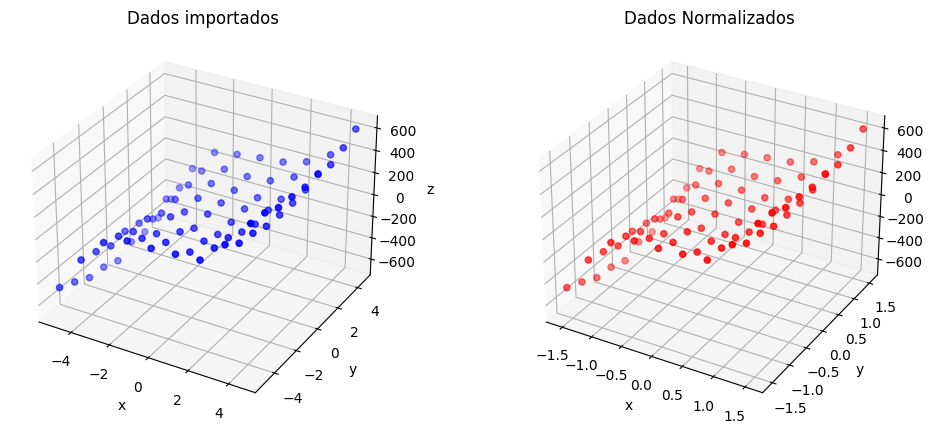

In [83]:
from os import X_OK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# @brief: importa dados do excel
def GetData():
  df = pd.read_excel("Trabalho3dados.xlsx")
  x = df['x']
  y = df['y']
  z = df['z']
  return(x, y, z)

def NormalizeData(Data):
  return ((Data - np.mean(Data)) / np.std(Data))

# @brief: plota os dados importados
def PlotData(fig, x, y, z):
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(x, y, z, c='blue', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados importados")
  return (ax)

def PlotNormalizedData(fig, x, y, z):
  xNorm = NormalizeData(x)
  yNorm = NormalizeData(y)
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter(xNorm, yNorm, z, c='red', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados Normalizados")
  return (xNorm, yNorm)

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)

def PlotFigure():
  x, y, z = GetData()
  fig = plt.figure(figsize=(12, 5))
  PlotData(fig, x, y, z)
  PlotNormalizedData(fig, x, y, z)

PlotFigure()

### 2. Propor uma estrutura para $h$:

A ideia é encontrar um modelo que seja capaz de capturar as características importantes dos dados de treinamento de forma eficiente e, ao mesmo tempo, seja simples o suficiente para evitar overfitting (ajuste excessivo aos dados de treinamento) e facilitar a interpretação dos resultados.

- O melhor modelo é o mais simples que permite avaliar o fenômeno estudado

In [19]:
def CurveFitFunction(a, b, c):
    x, y, z = GetData()
    return ((a * x**3) + (b * y**2) + c)

### 3. Definir uma medida de erro $J(e)$:

- objetivo é quantificar o quanto o modelo ℎ se desvia das respostas reais $Y_{i}$

- No ajuste de curva busca-se minimizar o erro entre as respostas reais ($Y_{i}$) e as respostas preditas ($\hat{Y}_{i}=h(x_{i})$) , $e_{i}=Y_{i}-\hat{Y}_{i}$. Para isso, precisa-se escolher uma medida de erro $J(e)$ com mínimo definido.

- **Erro Quadrático Médio (MSE):** =$\frac{1}{n}\sum_{i=1}^{n} e_{i}^{2}$

- **Raiz do Erro Quadrático Médio (RMSE):**=$\sqrt{ MSE}$

- **Erro Absoluto Médio (MAE):**=$\frac{1}{n}\sum_{i=1}^{n} \left |  e_{i}\right |$

- **Erro Percentual Absoluto Médio (MAPE)**:=$\frac{100}{n}\sum_{i=1}^{n} \left |  \frac{Yi-\hat{Y}i}{Yi}\right |$


In [ ]:
def CostFunctionMse(zPred, zReal):
    return (np.mean(zPred - zReal)**2)

def CostFunctionRmse(zPred, zReal):
    return (np.sqrt(CostFunctionMse(zPred, zReal)))

def CostFunctionMae(zPred, zReal):
    return (np.mean(np.abs(zPred - zReal)))

def CostFunctionMape(zPred, zReal):
    return (np.mean(np.abs((zPred - zReal) / zReal)) * 100)


### 4. Aplicar minimização para obter os parâmetros do modelo.

- Dado o conjunto de dados D={$(x_{1},y_{1}),(x_{2},y_{2}), ..., (x_{n},y_{n})$}, uma estrutura $\hat{Z}=h(x)$ para o modelo com conjunto de parâmetros $W$ e uma medida de erro $E(e)$, com $e_{i}=Z_{i}-\hat{Z}_{i}$, tem-se :

$$
min_{w} E(e) ; \hat{Z}=h(x)
$$

- Como $e=Z-\hat{Z}$, transforma-se o problema de otimização com restrição em um problema irrestrito

$$
 min_{w} E(Z-h(x))
 $$

**Calculando o Gradiente das funções de erro:**
- **Erro Quadrático Médio (MSE):** =$\frac{1}{n}\sum_{i=1}^{n} e_{i}^{2}$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (Z_i - \hat{Z}_i)^2 =  \frac{1}{n} \sum_{i=1}^{n} (Z_i - ax_i^3 - by_i^2-c)^2$$
$$\Rightarrow \nabla MSE = -\frac{2}{n}\sum_{i=1}^{n}((Z - \hat{Z})[x_i^3, y_i^2, 1]) $$

- **Raiz do Erro Quadrático Médio (RMSE):**=$\sqrt{ MSE}$
$$\sqrt{MSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (Z_i - \hat{Z}_i)^2} = \frac{1}{\sqrt{n}}\sum_{i=1}^{n}  \sqrt{(Z_i - ax_i^3 - by_i^2-c)^2}$$

$$\Rightarrow \nabla \sqrt{MSE} = -\frac{1}{n} \sum_{i=1}^{n} ((Z - \hat{Z})[x_i^3, y_i^2, 1] )$$

- **Erro Absoluto Médio (MAE):**=$\frac{1}{n}\sum_{i=1}^{n} \left |  e_{i}\right |$

- **Erro Percentual Absoluto Médio (MAPE)**:=$\frac{100}{n}\sum_{i=1}^{n} \left |  \frac{Yi-\hat{Y}i}{Yi}\right |$

In [101]:

def GradMSE(n, x, y, zReal, zPred):
    GradA = 2/n * np.sum((x ** 3) * (zPred - zReal))
    GradB = 2/n * np.sum((y ** 2) * (zPred - zReal))
    GradC = 2/n * np.sum((1) * (zPred - zReal))
    return GradA, GradB, GradC

def GradRMSE(n, x, y, zReal, zPred):
    GradA = 1/n * np.sum((x ** 3) * (zPred - zReal))
    GradB = 1/n * np.sum((y ** 2) * (zPred - zReal))
    GradC = 1/n * np.sum((1) * (zPred - zReal))
    return GradA, GradB, GradC

def GradMAE(n, x, y, zReal, zPred): # Falta calcular o gradiente
    GradA = 2/n * np.sum((x ** 3) * (zPred - zReal))
    GradB = 2/n * np.sum((y ** 2) * (zPred - zReal))
    GradC = 2/n * np.sum((1) * (zPred - zReal))
    return GradA, GradB, GradC

def GradMAPE(n, x, y, zReal, zPred): # Falta calcular o gradiente
    GradA = 1/n * np.sum((x ** 3) * (zPred - zReal))
    GradB = 1/n * np.sum((y ** 2) * (zPred - zReal))
    GradC = 1/n * np.sum((1) * (zPred - zReal))
    return GradA, GradB, GradC

Explicação do gradiente com os dados normalizados e os parametros desnormalizados

In [102]:

def GradientDescent(a, b, c, alpha, K, GradCostFunc):
    x, y, zReal = GetData()
    x = NormalizeData(x)
    y = NormalizeData(y)
    for k in range(K):
        zPred = CurveFitFunction(a, b, c)
        GradA, GradB, GradC = GradCostFunc(len(x), x, y, zReal, zPred)
        a = a - (alpha * GradA)
        b = b - (alpha * GradB)
        c = c - (alpha * GradC)
    return ((a / np.std(x)**3), (b / np.std(y)**2), c)


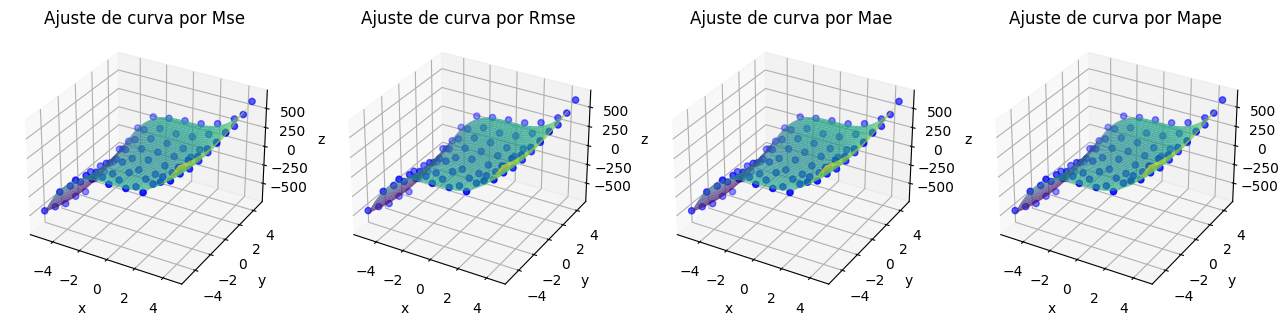

In [107]:
def GetSurface(x, y, GradCostFunc):
  a_opt, b_opt, c_opt = GradientDescent(1, 1, 1, 0.001, 100, GradCostFunc)
  X, Y = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
  Z = a_opt * X**3 + b_opt * Y**2 + c_opt
  return (X, Y, Z)

def PlotSurface(fig, X, Y, Z, label, i):
  ax = fig.add_subplot(1, 4, i, projection='3d')
  ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')
  ConfGraph3D(ax, 'x', 'y', 'z', "Ajuste de curva por " + label)
  return (ax)

def TestCostFunc(fig, x, y, zReal):
  CostFuncs = [GradMSE, GradRMSE, GradMAE, GradMAPE]
  Labels = ["Mse",  "Rmse", "Mae", "Mape"]
  for i in range(len(CostFuncs)):
    X, Y, Z = GetSurface(x, y, CostFuncs[i])
    ax = PlotSurface(fig, X, Y, Z, Labels[i], (i + 1))
    ax.scatter(x, y, zReal, c='blue', marker='o')


def PlotFigure():
  x, y, z = GetData()
  fig = plt.figure(figsize=(16, 7))
  TestCostFunc(fig, x, y, z)

PlotFigure()
